# Classical Mechanics Problem 3.23

Problem Statement

A grenade is thrown with an initial velocity $v_0$ from the origin at the top of a high cliff, subject to negligible air resistance **(a)** Using a suitable plotting program, plot the orbit with the following parameters: $v_0 = (4, 4)$, $g = 1$, and $0 \leq t \leq 4$ (and with x measured horizontally and y vertically up). Add to your plot suitable marks (dots or crosses, for example) to show the positions of the grenade at $ t = 1,2,3,4$. **(b)** At $t = 4$, when the grenade's velocity is $v$, it explodes into two equal pieces, one of which moves off with velocity $v + \Delta v$. What is the velocity of the other piece? **(c)** Assuming that $\Delta v = (1,3)$, add to your original plot the paths of the two pieces for $4 \leq t \leq 9$. Insert marks to show their positions at $ t = 5, 6, 7, 8, 9 $. Find some way to show clearly that the CM of the two pieces continues to follow the original parabolic path.

## Imports

As always, we need to import the useful libraries. In this case, I am only using the `matplotlib` library. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Velocity and Position as a Function of Time

In this case, since, after inital velocity, the only force that is acting upon the projectile is the gravity, our original equation of motion is found by simply writing down the acceleration in the in each axis direction. We are working in two dimensions, and gravity will be defined as pointing in the negative y direction.  

$$
    \begin{align*}
    \begin{cases}
        a_x = \ddot{x} = 0 \\
        a_y = \ddot{y} = -g
    \end{cases}
    \end{align*}
$$

We can take the time integral of this system of equations from $0$ to $t$. Our integration constants are the initial velocities in the x and y direction, respectively. Our resulting system is:

$$
    \begin{align*}
    \begin{cases}
        \dot{x} = \dot{x}_0 \\
        \dot{y} = \dot{y}_0 - g t
    \end{cases}
    \end{align*}
$$

If we integrate yet again, from $0$ to $t$, we get the function that describes the position of the projectile at any time $t$. In this case we're going to treat $x$ and $y$ as starting at the origin, so our integration constants are both 0. The resulting system of equations is simply:

$$
    \begin{align*}
    \begin{cases}
        x = \dot{x}_0 t \\
        y = \dot{y}_0 t - \frac{1}{2} g t^2
    \end{cases}
    \end{align*}
$$

Below, I have created two functions - one to describe the velocity at any given time `t` and one to describe position at any given time `t`. The functions input `v0`, a tuple, `g`, a number, and `t_range`, a list of t values to calculate. The functions then take the `t` values, calculate all of the velocities/positions associated with it and returns them in tuples in a list, in the form `[(x(t1), y(t1)), (x(t2), y(t2)), ...]`. 

Note, this can get a little confusing later, because in order to access any item in the list, you need to index twice (e.g. finding the x value of the third time point of array `v` would be `v[3][0]`), so keep that in mind going forward.

In [2]:
def velocity(v0, g, t_range):
    vx, vy = v0
    vel = []
    for t in t_range:
        vy = vy - g*t
        vel.append((vx, vy))
    return vel
    
def position(v0, g, t_range):
    vx, vy = v0
    pos = []
    for t in t_range:
        x = vx*t
        y = vy*t - 0.5*g*t**2
        pos.append((x,y))
    return pos

## Setting Up Inital Values

In our case, the initial values are that $v_0 = (4,4)$, $g=1$, and we're tasked with first recording the time points from 0 to 4, thus we can set a variable `t = [0,1,2,3,4]`. And while we're at it, why don't we go ahead and calculate the position of the object for these first few seconds?

In [3]:
v0 = (4, 4)
g = 1
t = [0,1,2,3,4]
object0Path = position(v0, g, t)

## Calculating the Paths

We are told that the velocity of half of the projectile for $t>4$ is $v + \Delta v$. Since both pieces are equal in size, we can easily set up the equation for the conservation of momentum like so:

$$
\begin{align*}
2mv = m(v + \Delta v) + m(v_2) \\
\Rightarrow v_2 = v - \Delta v
\end{align*}
$$

So, we conclude that we can track the position of both halves of the object by setting the velocity at $t=4$ to $v + \Delta v$ for one and $v - \Delta v$ for the other. In the code, I refer to the halves after the explosion as `object1` and `object2` and the object before the explosion `object0`. Accordingly, all the x and y's are labelled 0 to 2. The variable `finalV` is the instantaneous velocity of the projectile at $t=4$ when it explodes. `deltaV` simply refers to $\Delta v$ and is taken from the problem statement. 

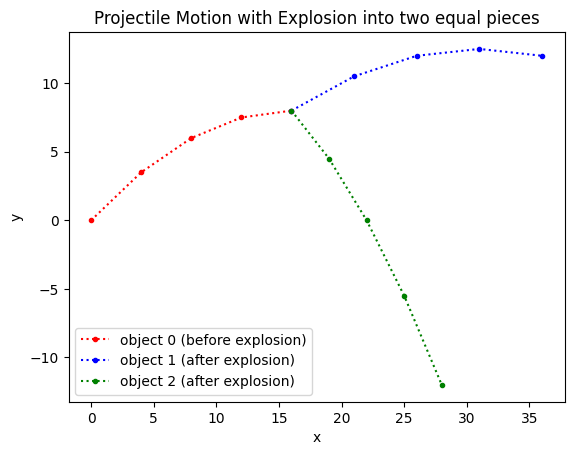

In [4]:
finalV = velocity(v0, g, [t[-1]])
deltaV1 = (1, 3)

object1NewV = (finalV[0][0] + deltaV1[0], finalV[0][1] + deltaV1[1])
object1Path = position(object1NewV, g, t)

object2NewV = (finalV[0][0] - deltaV1[0], finalV[0][1] - deltaV1[1])
object2Path = position(object2NewV, g, t)

x0 = [a[0]          for a in object0Path]
y0 = [a[1]          for a in object0Path]
x1 = [a[0] + x0[-1] for a in object1Path]
y1 = [a[1] + y0[-1] for a in object1Path]
x2 = [a[0] + x0[-1] for a in object2Path]
y2 = [a[1] + y0[-1] for a in object2Path]

plt.plot(x0, y0,'r.:', label='object 0 (before explosion)')
plt.plot(x1, y1, 'b.:', label='object 1 (after explosion)')
plt.plot(x2, y2, 'g.:', label='object 2 (after explosion)')
plt.title('Projectile Motion with Explosion into two equal pieces')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Calculating Center of Mass

In this case, this calculation turns out to be very easy since the object splits into equal halves. The center of mass on the x-axis and y-axis at any given t is given by the averages of the points. So, we can describe this mathematically as:

$$
\begin{align*}
    Center\ of\ Mass = ({x_1(t) + x_2(t) \over 2}, {y_1(t) + y_2(t) \over 2})
\end{align*}
$$

Thus, we can program this simply by taking our `x1`, `x2`, `y1`, and `y2` lists and performing this calculation and placing the result in a new path `CoMPath`. I will continue numbering the x and y's, this time I'll pick 3 for no particular reason besides consistency. 

In [5]:
CoMPath = [ (0.5*(x1[t] + x2[t]),0.5*(y1[t] + y2[t])) for t in range(len(x1))]
x3 = [ a[0] for a in CoMPath ]
y3 = [ a[1] for a in CoMPath ] 

And finally, we plot the data. I have formatted the `object0Path` and `CoMPath` the same, to illustrate how they are equivalent throughout the projectile's flight, even after the explosion. 

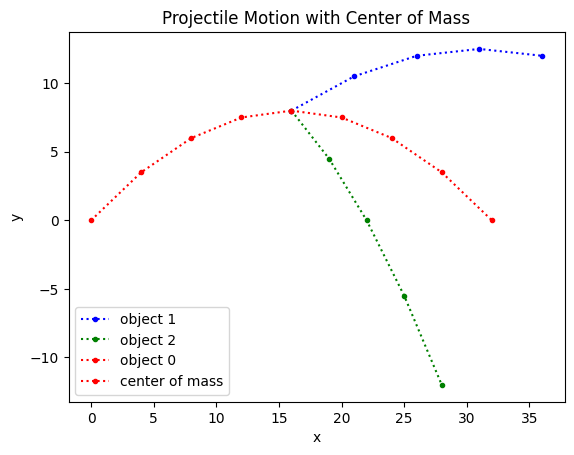

In [6]:
plt.plot(x1, y1, 'b.:', label='object 1')
plt.plot(x2, y2, 'g.:', label='object 2')
plt.plot(x0, y0, 'r.:', label='object 0')
plt.plot(x3, y3, 'r.:', label='center of mass')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projectile Motion with Center of Mass')
plt.legend()
plt.show()

Here we easily can see that the center of mass continues to follow the same parabolic pattern as the projectile before the explosion.